# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

## Data

The "Recipe Reviews and User Feedback Dataset" is a comprehensive repository of data encompassing various aspects of recipe reviews and user interactions. It includes essential information such as the recipe name, its ranking on the top 100 recipes list, a unique recipe code, and user details like user ID, user name, and an internal user reputation score. Each review comment is uniquely identified with a comment ID and comes with additional attributes, including the creation timestamp, reply count, and the number of up-votes and down-votes received. Users' sentiment towards recipes is quantified on a 1 to 5 star rating scale, with a score of 0 denoting an absence of rating. This dataset is a valuable resource for researchers and data scientists, facilitating endeavors in sentiment analysis, user behavior analysis, recipe recommendation systems, and more. It offers a window into the dynamics of recipe reviews and user feedback within the culinary website domain.



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is stored in a CSV file named 'recipe_reviews_dataset.csv'
df = pd.read_csv('../Datasets/recipe-reviews/Recipe Reviews and User Feedback Dataset.csv')
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

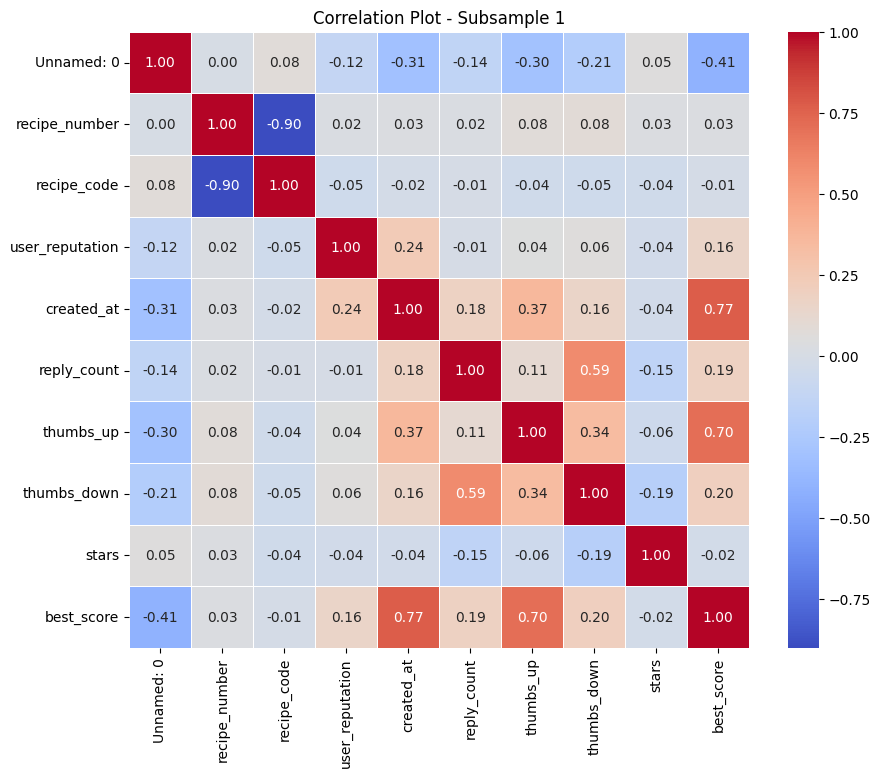

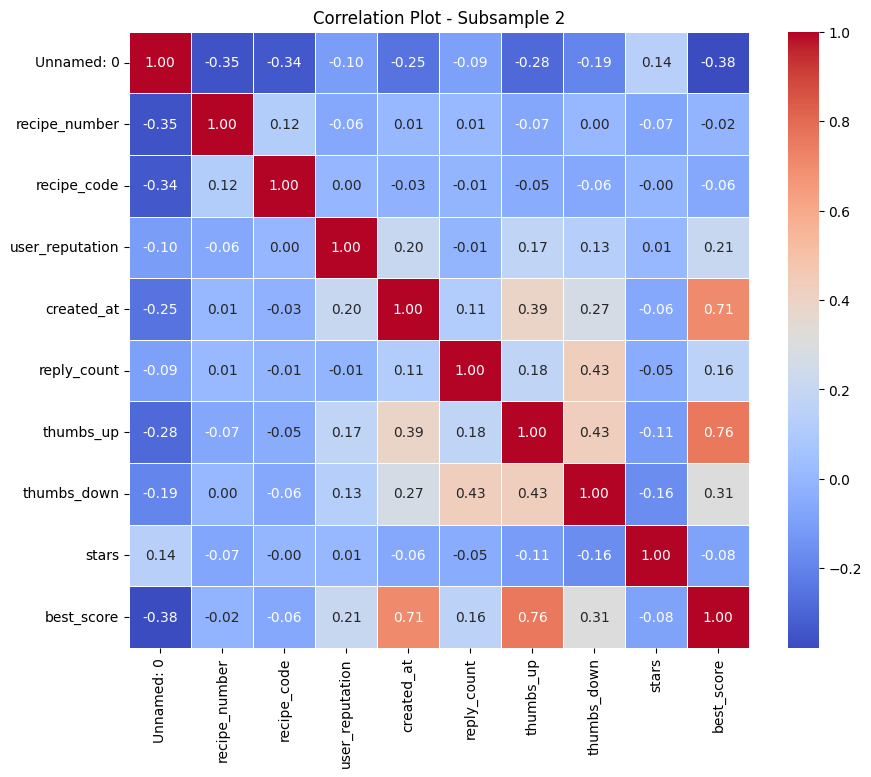

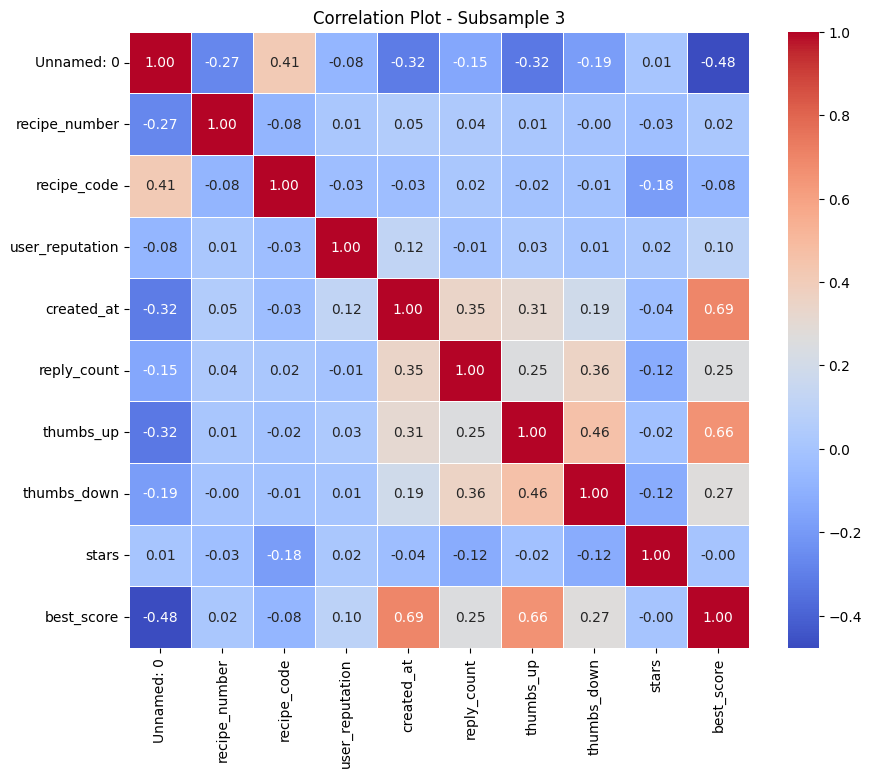

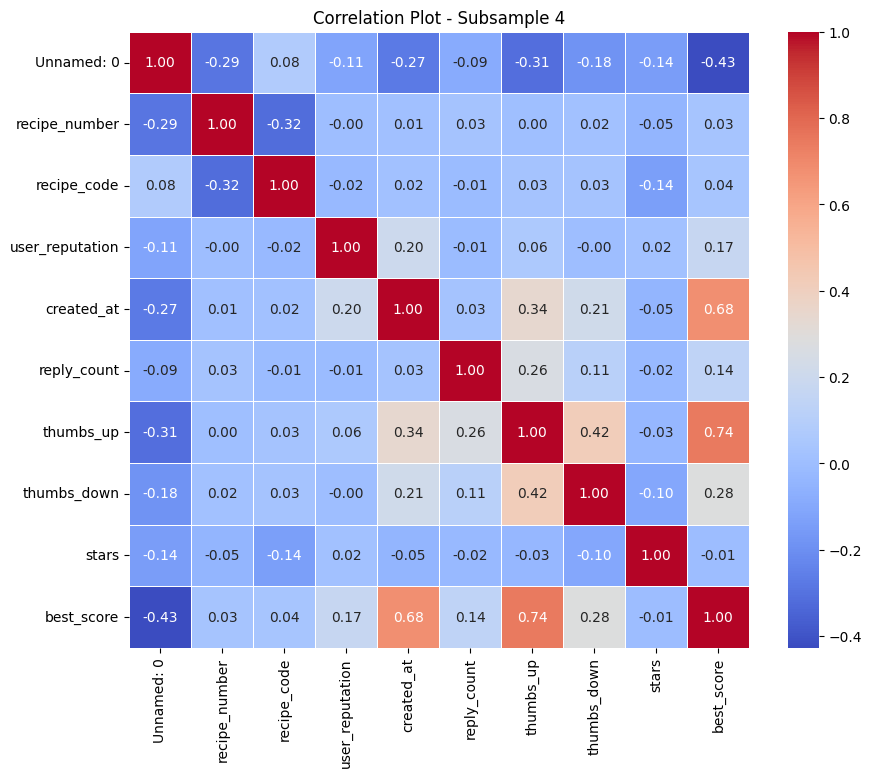

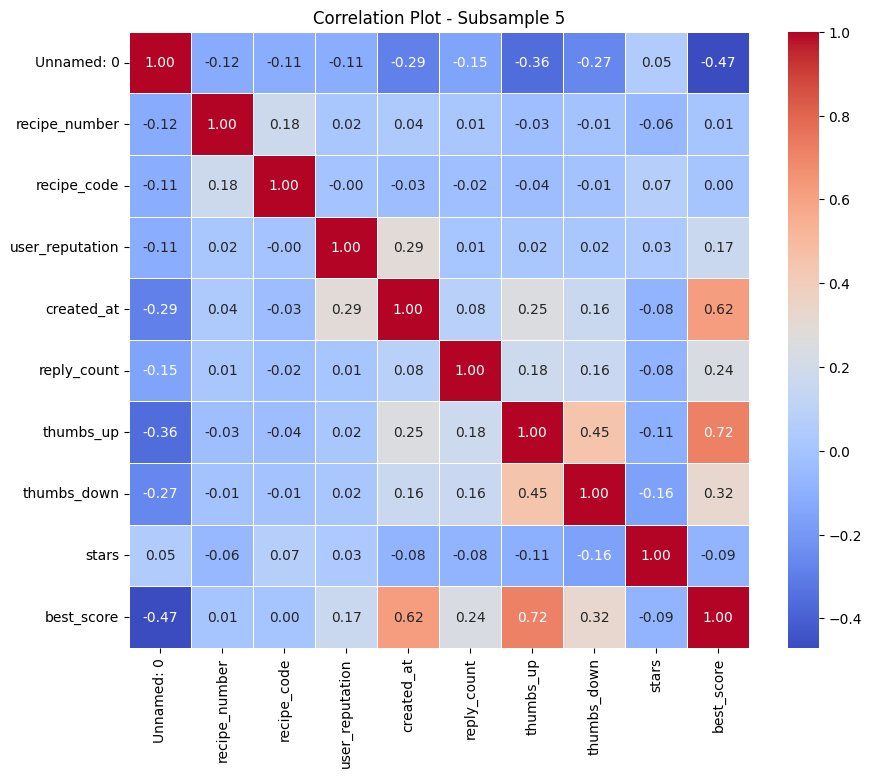

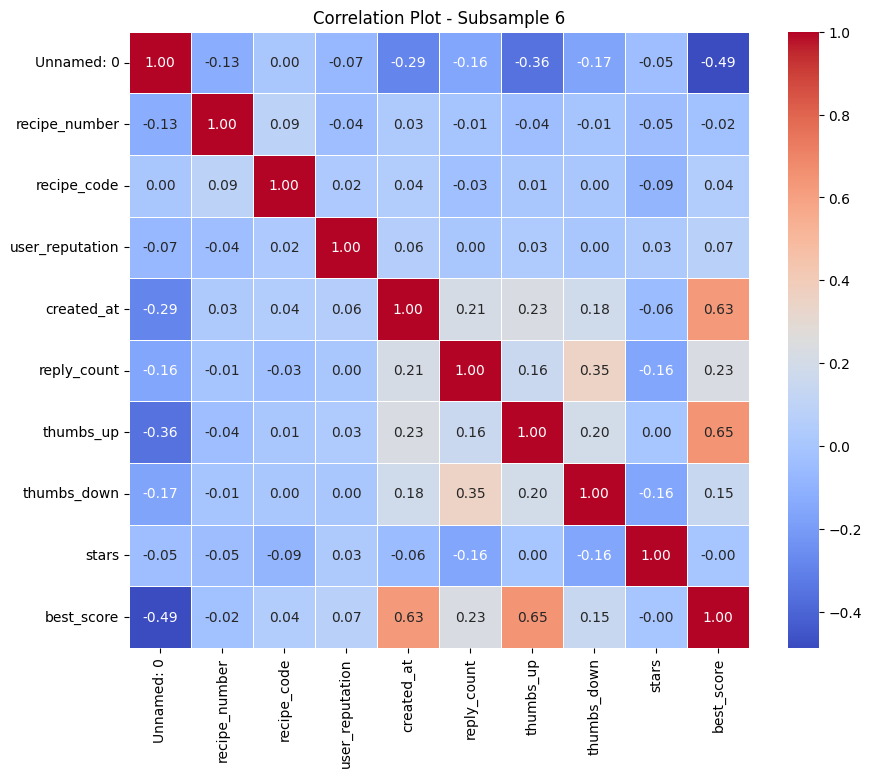

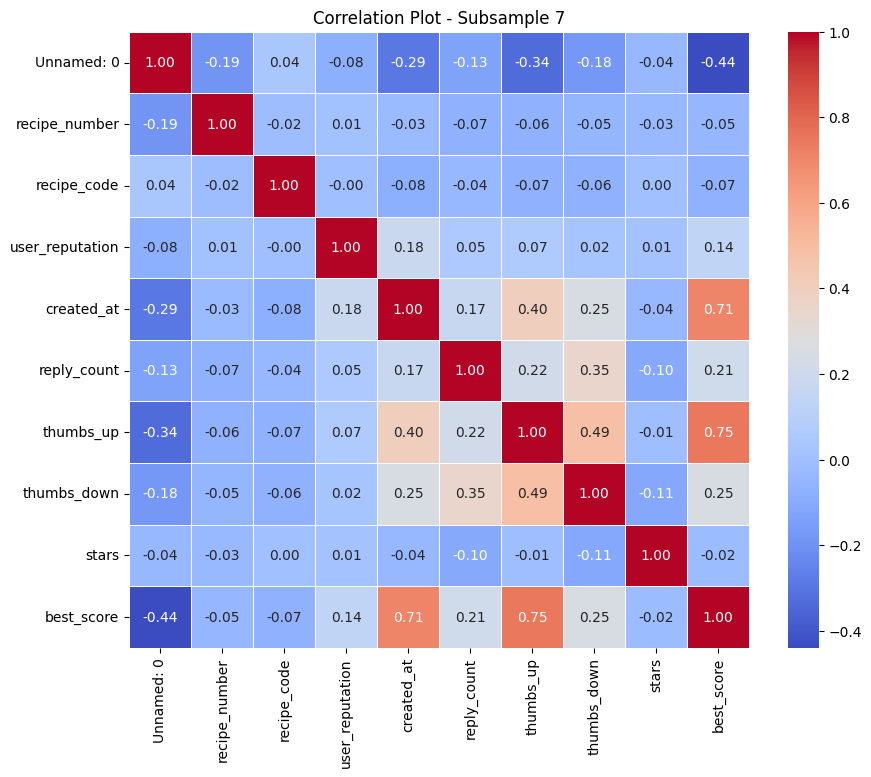

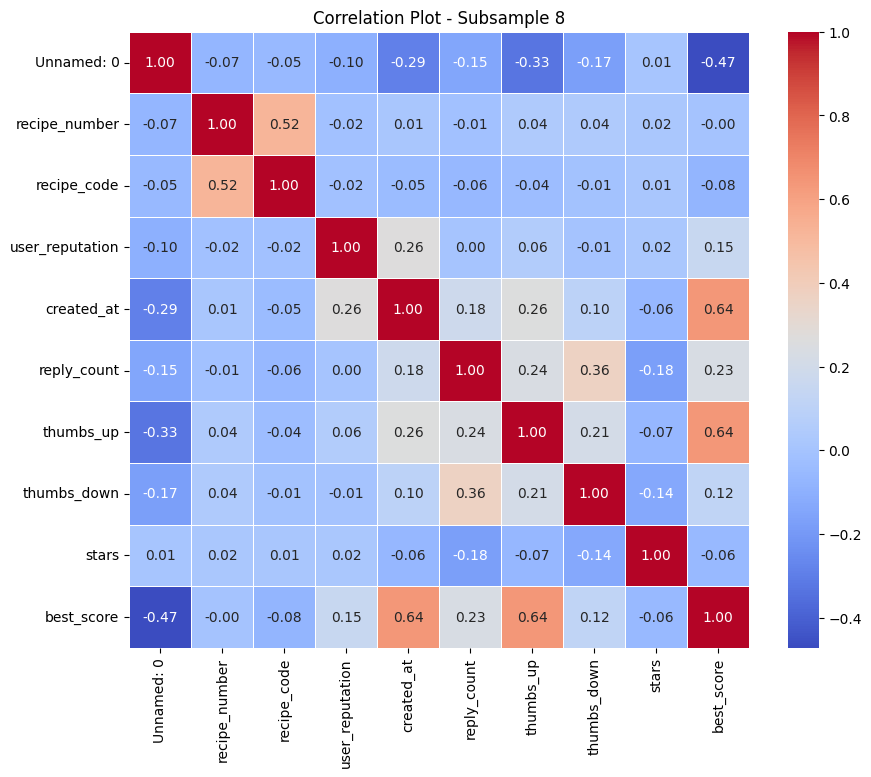

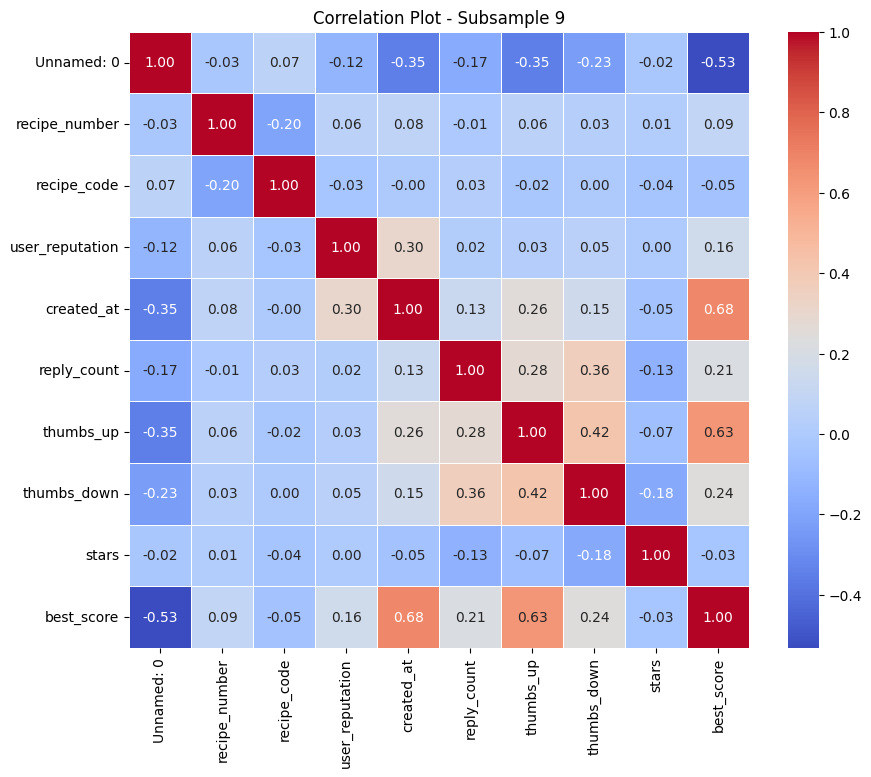

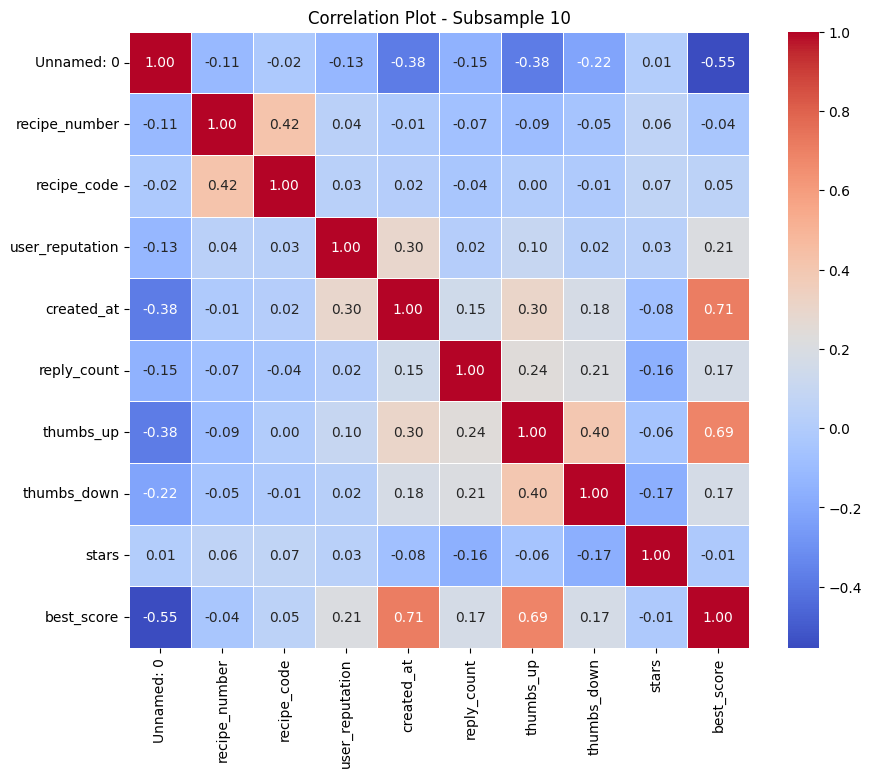

In [2]:
num_subsamples = 10
subsample_size = len(df) // num_subsamples
subsamples = []

for i in range(num_subsamples):
    start_idx = i * subsample_size
    end_idx = (i + 1) * subsample_size if i < num_subsamples - 1 else None
    subsample = df.iloc[start_idx:end_idx]
    subsamples.append(subsample)

for i, subsample in enumerate(subsamples, 1):
    numeric_cols = subsample.select_dtypes(include=np.number)
    corr = numeric_cols.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Plot - Subsample {i}')
    plt.show()


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**



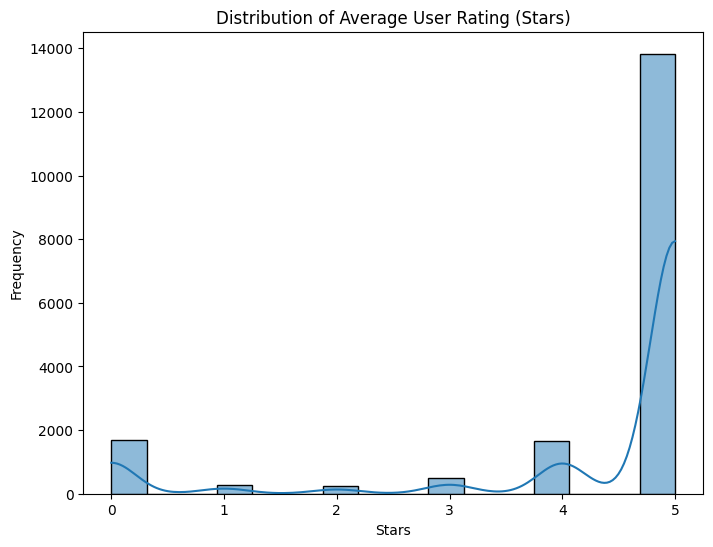

In [3]:
# Regression

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='stars', kde=True)
plt.title('Distribution of Average User Rating (Stars)')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

<Figure size 1000x800 with 0 Axes>

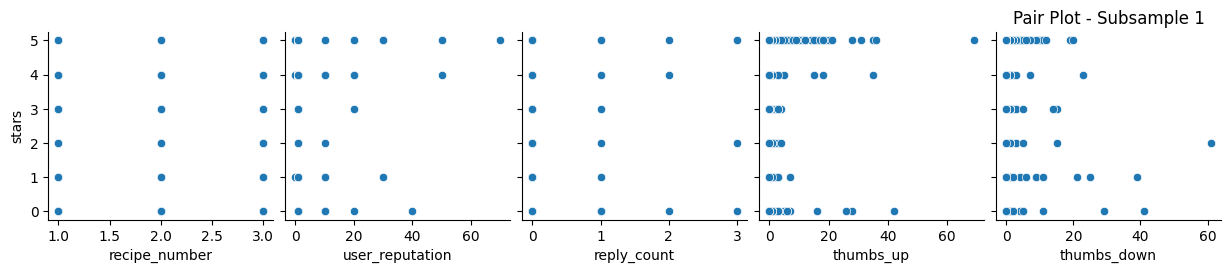

<Figure size 1000x800 with 0 Axes>

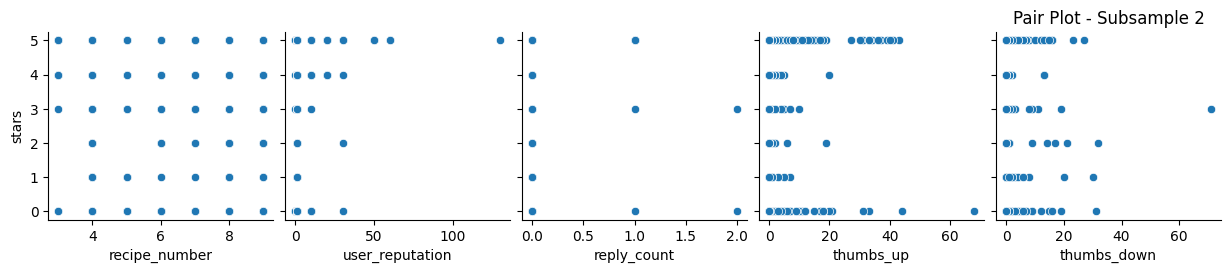

<Figure size 1000x800 with 0 Axes>

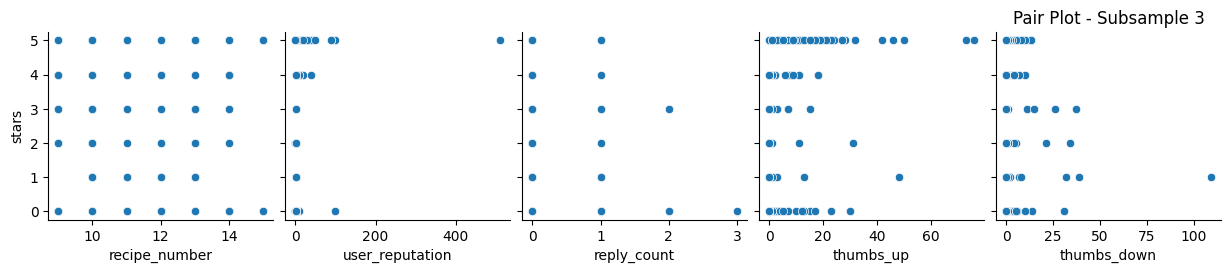

<Figure size 1000x800 with 0 Axes>

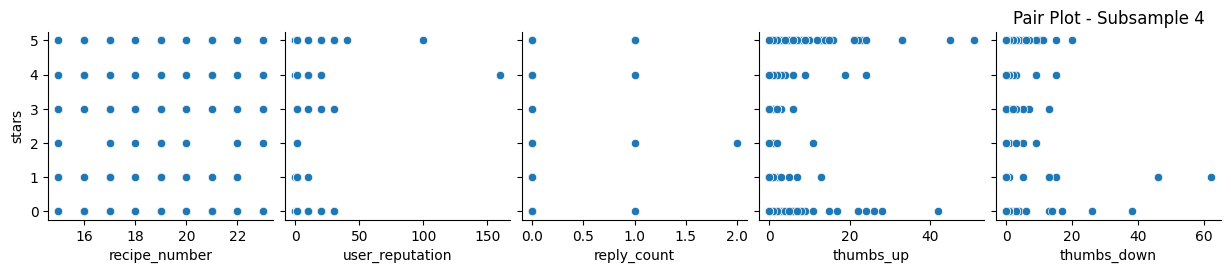

<Figure size 1000x800 with 0 Axes>

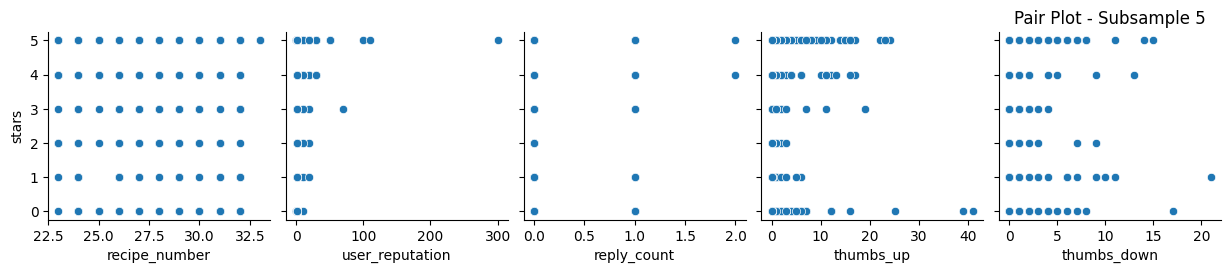

<Figure size 1000x800 with 0 Axes>

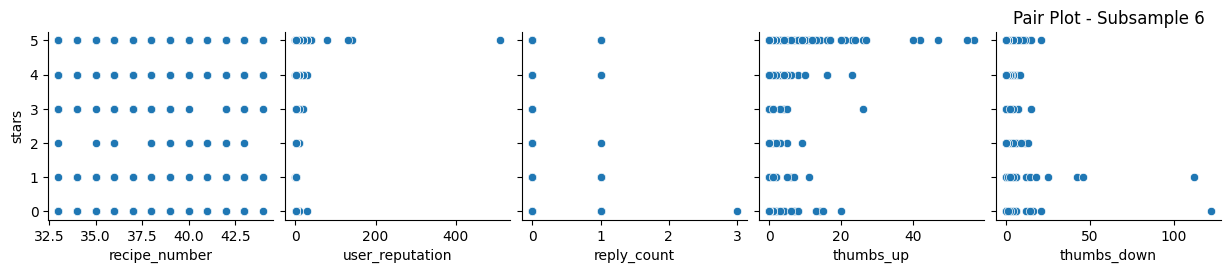

<Figure size 1000x800 with 0 Axes>

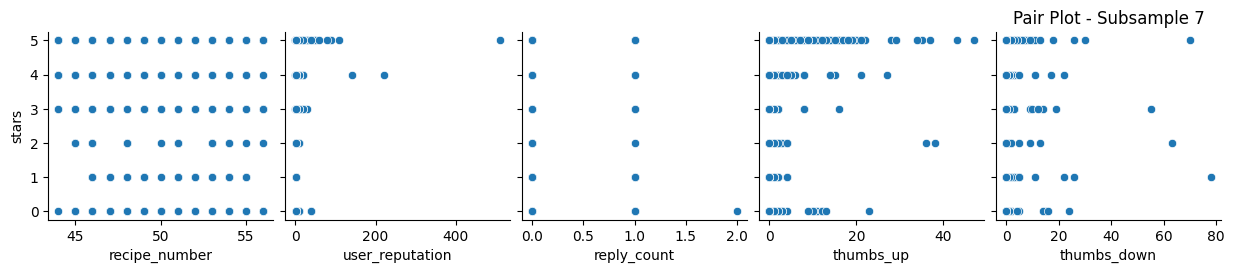

<Figure size 1000x800 with 0 Axes>

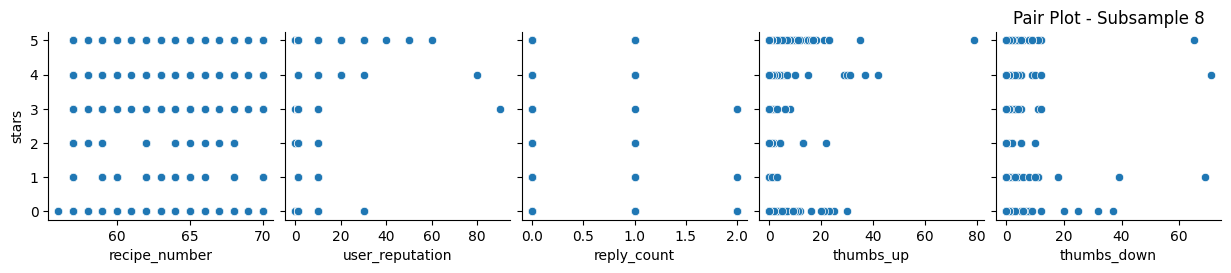

<Figure size 1000x800 with 0 Axes>

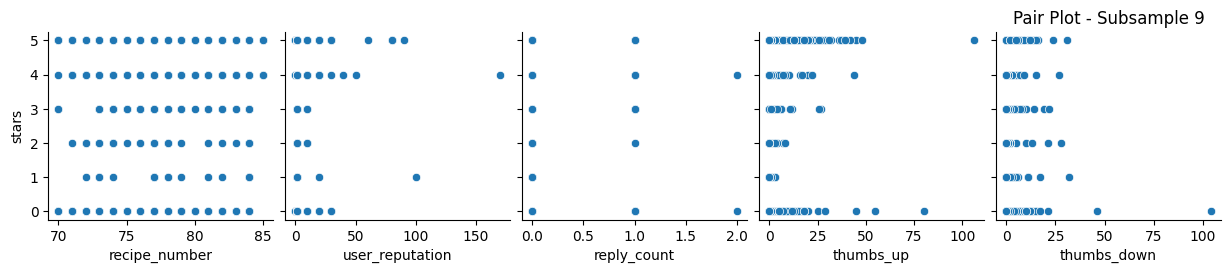

<Figure size 1000x800 with 0 Axes>

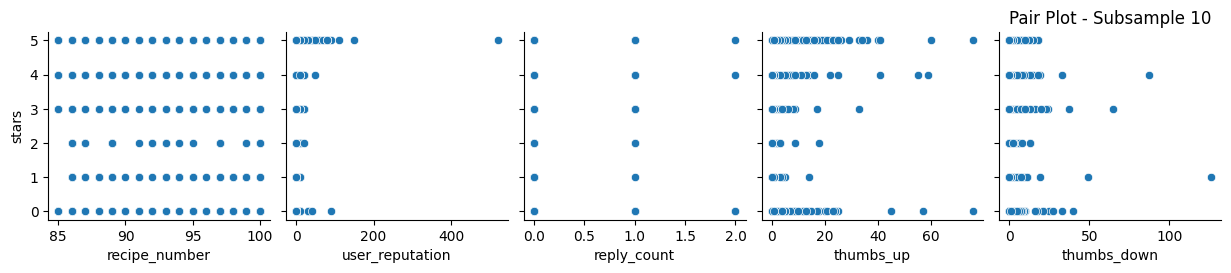

In [4]:
numerical_features = ['recipe_number', 'user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down']
for i, subsample in enumerate(subsamples, 1):
    plt.figure(figsize=(10, 8))
    sns.pairplot(subsample, x_vars=numerical_features, y_vars=['stars'], kind='scatter')
    plt.title(f'Pair Plot - Subsample {i}')
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1000x800 with 0 Axes>

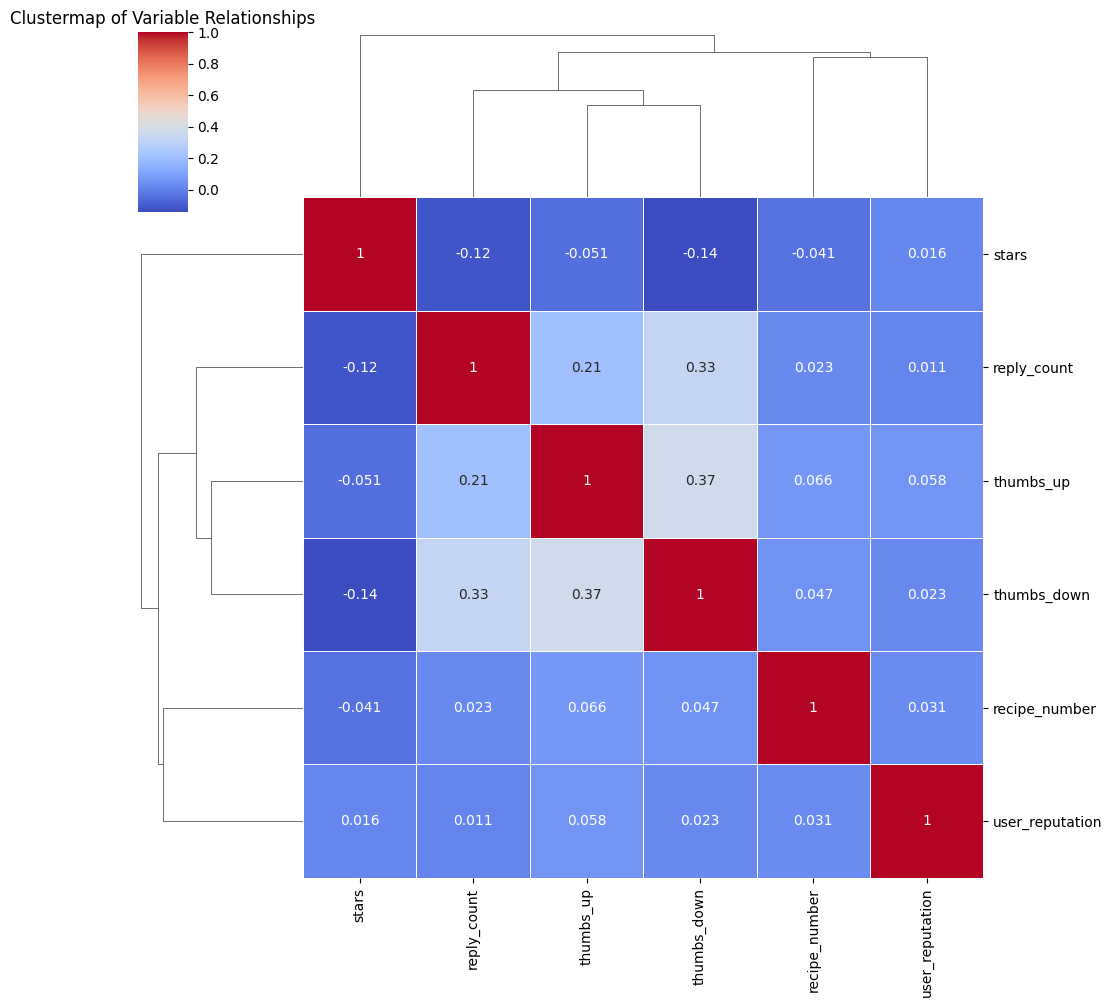

In [5]:
corr = numerical_features + ['stars']

subset_data = df[corr]

# Calculate correlation matrix
corr = subset_data.corr()

# Create clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = df[numerical_features]
y = df['stars']

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = svm_model.predict(X_test)
print("Performance before GridSearch:")
print(classification_report(y_test, y_pred, zero_division=1.0))

# Step 4: Hyperparameter Tuning (GridSearchCV)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)

# Step 5: Improved Model Training
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Step 6: Improved Model Evaluation
y_pred = best_svm_model.predict(X_test)
print("\nPerformance after GridSearch:")
print(classification_report(y_test, y_pred, zero_division=1.0))


Performance before GridSearch:
              precision    recall  f1-score   support

           0       0.00      0.00      1.00       340
           1       0.17      0.02      0.04        46
           2       1.00      0.00      0.00        44
           3       1.00      0.00      0.00        98
           4       1.00      0.00      0.00       321
           5       0.77      1.00      0.87      2788

    accuracy                           0.77      3637
   macro avg       0.66      0.17      0.32      3637
weighted avg       0.72      0.77      0.76      3637

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   3.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   3.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   3.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=   3.6s
[CV 5/5] END ........C=0.1, gamma=1, ker